In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pylab as pylab
import scipy.io
import matplotlib.patches as mpathes

#import pygal

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib inline

# rms

## kmeans

In [3]:
l_r_k = np.array([[[-6.78293783e+00, -7.01725835e+00],
  [ 1.51235695e+02,-6.13182107e+00],
  [-1.81109570e+01, 4.65361306e+01],
  [-2.89263498e+01,-1.71952109e+01],
  [-4.29598125e+01,-4.62158190e+00],
  [-1.47847975e+01, 3.84472277e+00],
  [ 1.10430159e+01, 1.23755828e+01],
  [-2.15835971e+01,-1.90719953e+01],
  [-2.91840853e+01,-8.68808336e+00]],

 [[-6.68623997e+01,  1.27352544e+01],
  [ 3.72219557e+02,  5.21190169e+00],
  [ 1.07505849e+01, -1.56018546e+01],
  [-4.59027868e+01,  8.75244855e+00],
  [-4.91703932e+01, -1.50954160e+01],
  [-6.52612999e+01,  4.87711674e+00],
  [-5.79279540e+01, -1.95346376e+01],
  [-6.36927010e+01,  3.24640770e+00],
  [-3.40195476e+01,  1.53375615e+01]],

 [[ 3.44231399e+02 ,-8.17906624e+00],
  [ 3.13073733e+02 ,-6.61561321e+00],
  [-1.20094953e+02 , 6.47559982e+00],
  [-6.78892497e+01 , 1.03873315e+01],
  [-1.01888671e+02 , 1.20452102e+01],
  [-9.83480658e+01 ,-1.85146807e+01],
  [-8.32017659e+01 ,-3.44230426e+00],
  [-7.87472280e+01 , 8.40538814e+00],
  [-1.07237844e+02 ,-5.94217363e-01]],

 [[ 4.51574076e+01, 2.92762948e+01],
  [-4.97520917e+01,-2.49625029e+01],
  [-1.43503151e+01,-5.28818909e+00],
  [ 3.42412059e+00,-4.13234479e+00],
  [ 6.64613664e+00, 2.42030859e+01],
  [ 2.28496412e+00, 1.43222078e+00],
  [ 1.13468293e+01,-2.76571301e+01],
  [-1.56244298e+01, 8.26043212e+00],
  [ 3.57667041e+01,-4.54836609e+01]],

 [[-1.19323420e+02, 1.48937269e+01],
  [ 8.63748893e+02, 4.41091345e+01],
  [-3.25881939e+01,-1.03544752e+02],
  [-9.16331683e+01, 2.38532234e+01],
  [-1.22855097e+02,-3.34089161e+01],
  [-1.26581113e+02, 2.56958077e+01],
  [-1.23072262e+02, 1.21411061e+01],
  [-1.28803167e+02, 5.92426920e+00],
  [-1.18920016e+02, 1.03318330e+01]],

 [[-4.38843678e+01, 4.44852425e+00],
  [ 3.13762452e+02,-6.98933784e+00],
  [-3.36602062e+01, 9.26383697e+00],
  [-5.10889051e+01, 2.70395392e+01],
  [-4.05154458e+01,-1.30655575e+01],
  [-1.54227569e+01,-1.38592529e+01],
  [-5.19068128e+01, 5.68403767e+00],
  [-3.03108433e+01,-1.46503970e+01],
  [-4.69731139e+01, 2.12860726e+00]],

 [[-2.76114833e+01,-1.31881920e+01],
  [ 6.98456667e+02, 1.25863366e+00],
  [-1.03810611e+02, 2.00054661e+01],
  [-1.12020533e+02, 1.07342321e+01],
  [-8.69597181e+01,-3.54786127e+01],
  [-8.71571315e+01, 5.57818266e+00],
  [-9.29952529e+01, 1.88953686e+01],
  [-6.74560485e+01,-9.40399452e+00],
  [-1.20492057e+02, 1.29499444e+00]],

 [[-8.58932638e+01, 4.51402220e+01],
  [ 6.53328856e+02,-6.90669224e+01],
  [-1.65893817e+02,-1.89478357e+02],
  [-4.15688514e+01, 3.74316028e+01],
  [-6.66002083e+01, 1.10973189e+01],
  [-7.95574249e+01, 4.58143467e+01],
  [-6.26956800e+01, 3.36039287e+01],
  [-1.03228837e+02, 1.81551672e+01],
  [-4.78907737e+01, 6.73026935e+01]],

 [[-2.33237608e+00,-9.59522654e+00],
  [ 9.98944544e+01,-5.67536455e+00],
  [-1.79484729e+00, 2.23385460e+01],
  [-1.59770561e+01, 1.23511871e+01],
  [-3.92912654e+01,-1.06956889e+01],
  [-1.83053656e+01, 1.36438037e-01],
  [-1.03663265e+01,-2.05476873e+01],
  [ 1.21952051e+01, 2.90316688e+01],
  [-2.40224226e+01,-1.73438727e+01]],

 [[-1.97992586e+01, 1.36733773e+01],
  [ 1.06603308e+01, 3.24585621e+00],
  [-2.31834208e+00,-2.43894760e+01],
  [ 6.65206627e+01,-1.36261611e+01],
  [-1.11605021e+01, 2.21658668e+01],
  [-3.23056287e+01,-2.62310019e+01],
  [ 3.61795168e+01, 9.87142215e+00],
  [-3.50030105e+01, 1.20664192e+01],
  [-3.36773344e+01, 1.57477430e+01]]])

In [5]:
'''
得到每一个受试者所有会话的聚类中心的平均值
'''
center = []
for i in range(9):
    center.append(np.mean(l_r_k[:,i,:] , axis=0))
    
center = np.array(center)

In [7]:
center

array([[  1.68992995,   8.21876565],
       [342.66285465,  -6.56160359],
       [-48.18716577, -23.36830492],
       [-38.50621169,   9.55958479],
       [-55.47549768,  -4.28542913],
       [-53.54386197,   2.87738999],
       [-42.35966921,   2.13896868],
       [-53.22546571,   4.19633655],
       [-52.66504904,   4.00335984]])

Text(0.5, 1.0, 'RMS_KMeans')

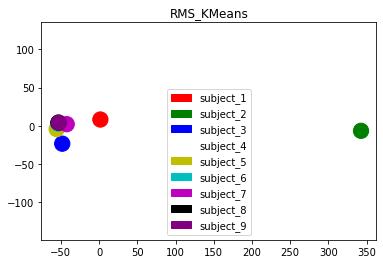

In [9]:
fig , ax = plt.subplots()
#plt.xlim((-25000,180000))
#plt.ylim((-10000,40000))
plt.axis('equal')
plt.scatter(center[:,0] , center[:,1])

'''
绘制以的圆
9个受试者 9个圆
'''


def get_farest(cc , pp):
    max_distance = 0.0
    
    for i in range(10):
        distance = np.square(cc[0] - pp[i][0])+np.square(cc[1] - pp[i][1])
        if distance > max_distance:
            max_distance = distance

    return np.sqrt(max_distance)

colors = ['r','g','b','w','y','c','m','k','purple']
labels=['subject_1', 'subject_2', 'subject_3', 'subject_4', 'subject_5', 'subject_6', 'subject_7', 'subject_8', 'subject_9']

for i in range(9):
    #radius = get_farest(center[i] , p_r_k[:,i,:])
    radius = 10
    circle = mpathes.Circle(center[i] , radius=radius , fill=True ,color=colors[i], label=labels[i])
    ax.add_patch(circle)

plt.legend()
plt.title('RMS_KMeans')

## dbscan

In [ ]:
l_r_d = np.array([[[-1.58397253e+01  7.33060115e-01]
  [ 1.66112814e+02  3.51991153e+01]
  [-2.85222185e+01 -4.28520216e+00]
  [-5.44697496e+01 -7.19906860e+00]
  [-6.48971278e+00 -2.41782532e+01]
  [-1.70254362e+01  1.12849906e+01]
  [ 1.06902956e+01 -1.29774099e+01]
  [-2.50957692e+01  1.44937752e+01]
  [-2.94143245e+01 -1.30405220e+01]]

 [[-6.25456477e+01 -1.48600943e+01]
  [ 3.70994111e+02  8.44176116e+00]
  [-1.62329686e+00  1.39180870e+01]
  [-4.24726961e+01  1.08201169e+01]
  [-9.31130214e+01 -2.78272397e+01]
  [-3.04219073e+01  1.46265266e+01]
  [-2.89737939e+01 -2.28428209e+01]
  [-7.91991131e+01 -7.18569307e+00]
  [-3.25115760e+01  2.48381387e+01]]

 [[-1.22869752e+02  1.68408866e+01]
  [ 7.57597824e+02  3.45742285e+00]
  [-7.98638692e+01 -5.22605923e+00]
  [-1.04587003e+02  4.17390411e+00]
  [-1.01499076e+02 -2.73231427e+01]
  [-6.80227577e+01  5.41657221e+00]
  [-9.50040772e+01 -7.76661350e+00]
  [-8.70830603e+01  2.97347117e+01]
  [-9.33624442e+01 -3.02591155e+01]]

 [[ 1.56333198e+00 -6.62291650e+00]
  [ 4.67267623e+01  5.30241640e+01]
  [-1.93168315e+01 -5.92730866e+01]
  [-3.36537702e+01  2.10567909e+01]
  [-1.69642559e+01  1.77499636e+01]
  [ 1.99861823e+01 -3.38750736e+00]
  [ 7.20299584e+00 -3.67477689e+01]
  [-1.39184778e+01  1.14226273e+01]
  [ 3.32438824e+01 -4.15126917e+01]]

 [[-1.05712828e+02  3.04287914e+01]
  [ 8.63748893e+02  4.41091345e+01]
  [-1.44872109e+01 -1.31717526e+02]
  [-1.37349986e+02  3.00458681e+01]
  [-1.12039350e+02 -3.11732038e+01]
  [-1.24690984e+02  2.47266352e+01]
  [-1.23211169e+02  8.09244228e+00]
  [-1.28492458e+02  1.55187467e+01]
  [-1.17758011e+02  9.97020046e+00]]

 [[ 2.07376101e+02 -1.20436919e+01]
  [ 5.85166227e+01  1.83023002e+01]
  [-3.60302578e+01  2.76208243e+01]
  [-2.29839477e+01 -3.46842081e+01]
  [-2.67422030e+01  2.77233367e+01]
  [-4.39736256e+01  1.21983430e+01]
  [-5.10287192e+01 -3.44645645e+01]
  [-2.98156082e+01 -6.23656065e+00]
  [-5.53183622e+01  1.58422097e+00]]

 [[-4.31727345e+01 -1.94766766e+01]
  [ 6.98456667e+02  1.25863366e+00]
  [-8.38717655e+01  5.31001128e+01]
  [-8.07552651e+01 -7.21810407e+01]
  [-1.08063844e+02  6.64876284e+00]
  [-1.24947278e+02  3.62815376e+01]
  [-7.31310620e+01 -6.63187563e+00]
  [-6.60602517e+01 -6.67513015e+00]
  [-1.18510666e+02  7.37207876e+00]]

 [[-8.15017918e+01  4.80955402e+01]
  [ 6.52255517e+02 -4.36382195e+01]
  [-1.67466040e+02 -2.15577039e+02]
  [-3.74727852e+01  3.51467960e+01]
  [-8.06599422e+01  1.78724377e+01]
  [-6.90535904e+01  4.11820350e+01]
  [-7.08754591e+01  7.40025581e+01]
  [-9.42477942e+01  1.08995756e+00]
  [-5.09781143e+01  4.18259341e+01]]

 [[ 1.85868386e+01  2.73047364e+01]
  [ 1.03390788e+02 -8.91432317e+00]
  [-2.75634832e+01 -1.12755759e+01]
  [ 8.54864862e+00  3.44294030e+01]
  [-3.96499241e+01 -3.45077768e+01]
  [-3.40367065e+01  2.38268191e+01]
  [-2.03779646e+01 -2.49665392e+01]
  [ 1.95111885e+01  1.14592454e+01]
  [-2.84093853e+01 -1.73559890e+01]]

 [[-5.12989464e+00  5.83212415e+00]
  [-1.77584179e+00 -1.87767874e+01]
  [ 6.14897841e+01 -6.06395926e+00]
  [-3.95003008e+01 -2.89981598e+01]
  [ 2.10369765e+01  1.23187564e+01]
  [ 8.14165936e+00 -4.01104317e+00]
  [ 1.16015459e+01  9.85636953e+00]
  [-3.90388805e+01  3.05088835e+01]
  [-3.77286143e+01  1.18578618e+01]]])

## gmm

In [ ]:
l_r_g = np.array([[[-3.11098394e+01 -5.65418515e+00]
  [ 1.42553474e+02 -2.39871817e+01]
  [-3.90723905e+00  5.54159097e+01]
  [-3.98768467e+01  1.62147842e+01]
  [-6.38333608e+00 -3.08135346e+01]
  [-8.65075240e+00  1.27851277e+01]
  [-1.07489301e+01  1.28583387e+01]
  [-1.27718825e+01 -2.80985347e+01]
  [-2.92020341e+01 -8.66707970e+00]]

 [[-5.05218536e+01 -7.94087115e+00]
  [ 3.55328748e+02  1.41324063e+01]
  [-1.22485271e+01  8.03881750e+00]
  [-4.59988059e+01 -6.96906928e+00]
  [-3.45630624e+01 -2.38573986e+01]
  [-5.16724082e+01  1.18290114e+01]
  [-6.40798450e+01 -1.71128309e+01]
  [-6.34881244e+01 -1.88311951e+00]
  [-3.25988925e+01  2.36881532e+01]]

 [[-7.79191300e+01 -1.94275257e+01]
  [ 7.30263290e+02  1.29745395e+01]
  [-8.32583255e+01  3.20048893e+01]
  [-9.60518607e+01 -8.76458847e+00]
  [-1.04340970e+02 -6.34788964e+00]
  [-6.93944486e+01 -8.72161857e+00]
  [-7.20998797e+01 -1.12247846e+01]
  [-1.22862209e+02  1.68502583e+01]
  [-9.88796481e+01 -1.83511053e+01]]

 [[-1.52997035e+01 -2.11189849e+01]
  [ 7.57319008e+01  2.93860649e+01]
  [-8.07407018e+00 -4.22601960e+01]
  [-7.04225698e+01  3.42996541e+01]
  [ 2.50810450e+00  8.84143105e+00]
  [ 7.95946938e+00 -3.48319725e+00]
  [ 1.89536011e+01 -1.36917735e+01]
  [-1.30850533e+01  3.00342215e+00]
  [ 5.69956695e+00 -2.49072379e+00]]

 [[ 3.32887826e+01  1.10895326e+01]
  [ 7.17128581e+02  4.35269731e+01]
  [-3.25881939e+01 -1.03544752e+02]
  [-9.21392799e+01 -2.92356792e+01]
  [-1.35383046e+02  1.56652837e+01]
  [-1.18570339e+02  2.58317837e+01]
  [-1.22850212e+02  1.67885500e+01]
  [-1.29774756e+02  9.53972727e+00]
  [-1.18644767e+02  1.04825775e+01]]

 [[-4.36125070e+01 -4.49475365e+01]
  [ 3.15223253e+02  1.59180670e+01]
  [-7.92071708e+01  2.58919404e+01]
  [ 8.96152598e-01 -1.19009439e+01]
  [-5.20221933e+01  1.07652140e+01]
  [-5.34525704e+01  4.03777188e+01]
  [-3.73596515e+00 -2.49320419e+01]
  [-3.39268688e+01 -1.07171461e+01]
  [-5.01621301e+01 -4.55271853e-01]]

 [[-9.28384025e+01  2.30322791e+01]
  [ 6.98456667e+02  1.25863366e+00]
  [-7.62516163e+01 -2.09899308e+01]
  [-9.63603614e+01 -2.38876056e+01]
  [-3.70322499e+01 -6.20324064e+00]
  [-1.24947278e+02  3.62815376e+01]
  [-8.73980793e+01 -2.95753548e+00]
  [-6.74355649e+01 -1.42880207e+01]
  [-1.06895783e+02  4.70819037e+01]]

 [[-7.07895405e+01 -5.04819607e+00]
  [ 6.22047805e+02 -3.65528681e+01]
  [-1.39386332e+02 -1.59470904e+02]
  [-4.94295982e+01  1.91071655e+01]
  [-7.01561078e+01  1.32401260e+01]
  [-6.69617985e+01  5.55787164e+01]
  [-8.17863544e+01  2.20784044e+01]
  [-9.57784730e+01  4.91565035e+01]
  [-4.77596009e+01  4.19110521e+01]]

 [[-7.11081125e+00 -1.36456988e+01]
  [ 1.08946958e+02  2.50878081e+00]
  [ 6.03031575e-02  3.65394258e+01]
  [-2.13879785e+01 -1.27660517e+00]
  [-3.29348916e+01 -1.55533801e+01]
  [-2.44084005e+01  1.71045156e+01]
  [-9.51099068e+00 -1.76464934e+01]
  [ 1.03682335e+01  9.31332792e+00]
  [-2.40224226e+01 -1.73438727e+01]]

 [[-4.62396069e+01  4.17621434e+01]
  [ 2.79128070e+01  1.57744251e+01]
  [-4.00529506e+01  1.67177734e+01]
  [ 4.07307154e+01  1.26722118e+00]
  [ 4.93009641e+00 -3.83396725e+01]
  [ 2.02725299e+01 -2.27873622e+01]
  [ 3.89900560e+01  1.97997051e+01]
  [-3.50030105e+01  1.20664192e+01]
  [-3.24354748e+01  1.65916189e+01]]])

# cnn-ae

## kmeans

In [ ]:
l_c_k = np.array([[[ 1.20163042e+01 -2.45275065e+01]
  [ 1.79478082e+02  5.81641992e+00]
  [ 2.94079907e+01 -4.58472714e+01]
  [-3.49864939e+01  1.19720668e+01]
  [-3.48289386e+01  9.04641504e+00]
  [-3.71930481e+01  1.00280145e+01]
  [-3.00847996e+01  2.99830070e+00]
  [-4.39203868e+01  1.35898832e+01]
  [-4.91539502e+01  1.47138454e+01]]

 [[ 5.15547423e+01  3.98019409e+01]
  [ 2.25658147e+02  4.29473179e+00]
  [ 3.83341091e+01 -9.18949267e+01]
  [-2.56389399e+01 -3.58589332e+01]
  [-5.20677705e+01  4.58145224e+01]
  [-5.64237142e+01 -7.13741450e+00]
  [-5.95664534e+01  6.91289067e+00]
  [-6.83829390e+01  2.03695305e+01]
  [ 9.15933437e+00  1.79839807e+01]]

 [[-1.48334313e+02  3.13526608e+01]
  [ 7.63549949e+02  7.49548064e+00]
  [-8.33409067e+01 -4.69218525e+01]
  [-4.84363958e+01 -4.59085638e+00]
  [-9.39484540e+01 -9.43200218e-01]
  [-9.98656210e+01 -1.96885342e+01]
  [-9.61545242e+01  8.03422416e+00]
  [-9.61834328e+01  1.00579443e+01]
  [ 1.61459278e+02  1.80652866e+01]]

 [[ 3.09085145e+01 -1.22821050e+01]
  [-3.82812475e+01 -3.67672805e+01]
  [-2.86634122e+01  8.35768961e+01]
  [ 1.57531796e+01  4.42583020e+01]
  [-1.29279270e+01 -1.67742895e+01]
  [ 4.55548017e+00 -8.08418979e+00]
  [ 1.23781297e+01 -2.22274096e+01]
  [ 1.19849705e+01 -1.56218579e+01]
  [ 4.29544335e+00 -1.61137553e+01]]

 [[-2.25828798e+02 -1.73087404e+01]
  [ 1.79300332e+03 -9.38057707e+00]
  [-2.04005531e+02  2.34420838e+02]
  [-2.25549754e+02  8.72693300e+00]
  [-2.27185141e+02 -1.63580597e+01]
  [-2.31140743e+02 -3.78908182e+01]
  [ 1.71484707e+03 -2.68047090e+01]
  [-2.29564340e+02 -5.26548160e+01]
  [-2.03804396e+02  2.32205069e+02]]

 [[-2.45879696e+02 -7.49155591e+01]
  [ 1.78854672e+03  1.96236657e+00]
  [-2.41639561e+02  3.54219214e+01]
  [-2.20362075e+02 -5.44464891e+00]
  [-2.47993521e+02 -3.49306897e-01]
  [ 1.49214161e+03 -4.01710449e+01]
  [-2.41770456e+02  2.81422003e+01]
  [-1.80441720e+02  8.56319075e+00]
  [-1.85901393e+02  1.25595464e+01]]

 [[ 2.36528710e+02 -3.78643855e+01]
  [ 2.93151337e+02 -3.06923303e+01]
  [-3.05175774e+01  1.61922379e+02]
  [-6.56484745e+01  3.27024246e+01]
  [-6.33352370e+01  3.53704910e+01]
  [-9.50145034e+01 -2.99191861e+01]
  [-7.97188860e+01 -4.55051142e+01]
  [-9.84257309e+01 -4.05502897e+01]
  [-7.36549064e+01 -2.17197102e-01]]

 [[-8.44052974e+01 -2.74298314e+01]
  [ 6.69784420e+02 -2.22631502e+00]
  [-9.83342760e+01 -1.03734794e+02]
  [-3.60649745e+01  1.61202767e+01]
  [-8.80833595e+01  2.85262317e+01]
  [-7.94865494e+01  8.22353015e+00]
  [-8.42470200e+01 -1.28191065e+01]
  [-9.93795240e+01 -1.61728265e-01]
  [-8.97691048e+01  4.46702522e+01]]

 [[-4.07832129e+01 -5.56856608e-01]
  [ 2.69948299e+02  1.39180920e+01]
  [-2.30629913e+01 -2.91239884e+01]
  [-2.97861337e+01 -4.08129791e+00]
  [-3.67694811e+01  1.27107459e+01]
  [-3.47349489e+01 -5.86853237e+00]
  [-3.51359337e+01 -8.18809422e-01]
  [-2.69366337e+01  6.45747538e+00]
  [-2.09292694e+01  4.54399300e+00]]

 [[ 1.83378111e+00 -5.95920515e+00]
  [ 5.86194372e+00 -3.73528787e+00]
  [-1.45842939e+01  3.09797285e+01]
  [-7.00840875e+00  1.07946388e+01]
  [ 5.94254568e+00 -6.86061083e+00]
  [-6.17606716e+00  1.43678242e+00]
  [ 3.82436087e+00 -1.45794204e+01]
  [ 1.19193922e+01 -6.46971319e+00]
  [ 8.55485745e+00 -1.21004190e+00]]])

## dbscan

In [11]:
l_c_d = np.array([[[-3.20522095e+01 -1.04585801e+01]
  [ 1.77043969e+02  9.94864247e+00]
  [-6.02357685e+00 -1.39082463e+01]
  [-9.83327081e+00  1.42230585e+01]
  [-2.60039868e+01 -2.05188700e+00]
  [-2.12136973e+01  1.00774075e+01]
  [-2.66656602e+01 -3.81864956e+00]
  [ 6.67307326e+01 -6.33585901e+00]
  [-2.87007047e+01 -1.04701168e+01]]

 [[-1.11565013e+02 -2.79435022e+01]
  [ 9.63017874e+02  1.50176941e+01]
  [-3.28181008e+01  1.15610619e+01]
  [-1.42463718e+02 -6.15748504e+00]
  [-1.21217902e+02  1.29817887e+01]
  [-1.51248472e+02 -3.26253866e+01]
  [-1.34615300e+02  3.36156147e+01]
  [-1.24137271e+02 -1.22631455e+01]
  [-1.39936517e+02  4.52361196e+00]]

 [[-6.75516258e+01  3.69540229e+00]
  [ 5.95186755e+02 -8.28699798e+00]
  [-6.48764085e+01  1.04269790e+01]
  [-9.19446206e+01  1.91207966e+01]
  [-5.67273873e+01 -4.83261567e+01]
  [-8.51977181e+01  1.71075413e+01]
  [-7.75184574e+01 -2.72233839e+00]
  [-7.38111300e+01 -1.30779244e+01]
  [-7.44609399e+01  2.19520639e+01]]

 [[-9.92329816e+01  1.98373272e+00]
  [ 1.19453555e+02  8.01815539e+00]
  [-3.43850813e+01 -5.70083793e+01]
  [-2.41620983e+01  4.61777123e+01]
  [ 4.95525210e-01  5.59581210e+00]
  [ 1.43982380e+01 -6.58656984e+00]
  [ 4.90745437e+00 -2.18313140e+00]
  [ 4.73658339e+00  6.76758570e+00]
  [ 1.26258664e+01 -3.74333603e+00]]

 [[ 1.33867207e+02  5.68240907e+00]
  [ 9.41444812e+02  5.24607649e+00]
  [-1.19231956e+02 -3.80095651e+01]
  [-1.70419297e+02  3.18164109e+01]
  [-1.62806321e+02  1.19880370e+01]
  [-1.49642124e+02  8.54959477e+00]
  [-1.55408061e+02 -3.94864865e+00]
  [-1.55338228e+02  6.65806383e+00]
  [ 6.14774976e+02 -6.35167309e+00]]

 [[-5.11880883e+01 -2.91666417e+01]
  [ 4.63253982e+02 -1.58718865e+01]
  [-1.99176255e+01  1.18108070e+02]
  [-6.58675265e+01  1.02011505e+01]
  [-6.05869268e+01 -2.76683060e+01]
  [-4.65255545e+01 -3.04383283e+01]
  [-6.67454163e+01 -7.28649002e+00]
  [-6.02988763e+01 -1.42574886e+01]
  [-6.10833578e+01 -7.79974730e+00]]

 [[ 3.50404144e+02  2.18607870e-01]
  [ 3.77645349e+02 -1.87347914e+01]
  [-5.43227127e+01  1.43113053e+02]
  [-1.18999218e+02 -5.07263257e+01]
  [-1.07475417e+02 -1.37203294e+01]
  [-1.09656364e+02 -1.04498032e+01]
  [-1.18985866e+02 -1.89004960e+01]
  [-1.07179084e+02 -2.13671149e+01]
  [-9.58720953e+01  1.62417804e+01]]

 [[-6.61967798e+01 -1.01931232e+01]
  [ 3.99540713e+02 -5.75818114e+01]
  [ 6.31469323e+01  1.11722469e+02]
  [-7.75748131e+01  2.21248737e+00]
  [-6.55713796e+01  9.39303921e+00]
  [-6.11254008e+01 -1.13904971e+01]
  [-6.53634575e+01 -1.96961805e+01]
  [-7.39876963e+01 -1.38774729e+01]
  [ 1.57882169e+02 -1.78064247e+00]]

 [[-2.28185559e+01 -4.15631345e+00]
  [ 2.03466642e+02  1.52984270e+00]
  [-1.45274076e+01  8.28001928e-01]
  [-3.22343318e+01  3.11494886e+00]
  [-3.67748248e+01  2.24850828e+00]
  [-3.30329480e+01  1.57232486e+01]
  [-2.10049956e+01 -2.45346232e+00]
  [-2.39447649e+01 -1.13286729e+01]
  [-1.27547102e+01  6.46980485e+00]]

 [[ 6.02336941e+01  8.35188625e+00]
  [-7.44861571e+01 -9.12720606e+00]
  [-9.03871804e+00  4.20795573e+01]
  [ 1.80039835e+01 -2.21879267e+01]
  [-2.09184276e+01  6.47348651e+00]
  [ 2.43254767e+01 -1.12183016e+01]
  [ 5.51256356e+00 -1.80432110e+01]
  [ 8.14183313e+00 -1.13610339e+01]
  [-1.24325439e+01  1.25813028e+01]]])

SyntaxError: invalid syntax (<ipython-input-11-7bdeb334dc60>, line 2)

## gmm

In [ ]:
l_c_g = np.array([[[ 9.77618386e+02  1.35019194e+01]
  [-9.44513101e+01 -1.11208290e+00]
  [-1.13368020e+02 -2.65699195e+01]
  [-1.31138188e+02  1.52582282e+01]
  [-1.35024795e+02  2.93749993e+00]
  [-1.25214684e+02 -2.20016335e+00]
  [-1.25960466e+02  1.45216389e+00]
  [-1.30921284e+02  4.08384000e-01]
  [ 9.61883299e+02 -2.88173067e+00]]

 [[-1.54623952e+02 -9.61877502e+00]
  [ 1.51084537e+03 -1.83276957e+01]
  [-1.93603400e+02  1.70596113e+01]
  [-1.82090171e+02 -4.96273633e+01]
  [-1.51072632e+02  2.00266486e+01]
  [-2.09380495e+02  3.74365028e+01]
  [-2.12114711e+02 -7.58557476e+00]
  [-2.06953114e+02  1.51013178e+01]
  [-2.00976800e+02 -4.80797837e+00]]

 [[-2.29951995e+02 -1.17380666e+01]
  [ 1.83346106e+03  7.04344809e-01]
  [-2.17962211e+02 -9.73973957e+00]
  [-2.32928347e+02  2.06927540e+01]
  [-2.28374354e+02 -1.33438489e+01]
  [-2.34489190e+02  1.18619687e+01]
  [-2.30089279e+02 -2.00655476e+00]
  [-2.29471210e+02  1.42827442e+01]
  [-2.29653545e+02 -7.28350717e+00]]

 [[ 8.70471792e+00  1.74948597e+00]
  [-5.33723973e+01 -1.07401568e+00]
  [ 3.43254025e+01  4.62596408e+00]
  [-1.37775610e+01 -6.98573271e+00]
  [-6.48842085e+00 -2.69744824e+00]
  [ 8.93974319e+00 -4.86425200e-01]
  [ 3.16819662e+00 -2.18768915e+00]
  [ 1.08594713e+01  3.93151965e+00]
  [-3.92037594e+01  2.06703981e+01]]

 [[-3.23002874e+02 -3.38367901e+01]
  [ 2.51654429e+03 -2.41609740e+01]
  [-2.49594420e+02  2.79790714e+02]
  [-3.16641313e+02 -4.63524040e+01]
  [-3.29899658e+02 -4.02371772e+01]
  [-3.23563465e+02 -1.94598911e+01]
  [-3.25711461e+02 -3.90351062e+01]
  [ 7.79365638e+02 -1.61749017e+01]
  [-2.40313334e+02  2.63665775e+02]]

 [[-1.31710109e+02  2.29128900e+01]
  [ 1.01706327e+03 -1.48135566e+01]
  [-9.21878349e+01  1.31294455e+01]
  [-1.40790637e+02 -2.49420273e+01]
  [-1.22368818e+02  7.16871230e+00]
  [-1.34344260e+02 -2.21655216e+01]
  [-1.29086426e+02  1.18041046e+01]
  [-9.28723888e+01 -2.16108588e+01]
  [ 4.72989137e+02  9.69709975e+00]]

 [[ 1.66639079e+03 -8.09080668e+00]
  [ 4.70343652e+02  5.97894564e+00]
  [-3.05415023e+02  8.91270705e+01]
  [-3.06211868e+02  9.18904973e+00]
  [-3.03320083e+02 -9.17719670e+00]
  [-3.06656660e+02 -7.10435122e+00]
  [-3.03937954e+02 -3.19510795e+01]
  [ 1.34548064e+03 -1.37607537e+01]
  [-3.11304899e+02 -2.24940459e+00]]

 [[-1.62319579e+02  2.11957244e+01]
  [ 9.99860764e+02  6.01281589e+01]
  [ 9.81904889e+00 -1.77337820e+02]
  [-1.37126762e+02  3.06013714e+01]
  [-1.40748418e+02  2.61489646e+01]
  [-1.16247038e+02 -1.93618241e+00]
  [-1.49302665e+02  1.50224971e+01]
  [-1.53141161e+02  2.20639625e+01]
  [-1.50522666e+02 -9.88426993e-01]]

 [[-1.11860978e+02 -3.30977904e+01]
  [ 8.79873164e+02  1.94725927e+00]
  [-1.15707986e+02 -1.10165459e+00]
  [-1.09757288e+02  1.11143016e+01]
  [-1.10202954e+02  8.10195622e+00]
  [-1.04353981e+02  5.66373089e+00]
  [-1.11583304e+02  5.02870905e+00]
  [-1.06446545e+02  2.19422316e+00]
  [-8.70558679e+01 -6.99150400e-02]]

 [[ 7.11738316e+00  9.80136134e+00]
  [ 3.01252955e+00  5.47981351e+00]
  [-1.69612090e+01 -1.34074995e+01]
  [-9.70844090e-01  1.58751947e+01]
  [-2.07364715e-01 -1.69325249e+01]
  [ 1.45543217e-01  6.04530084e+00]
  [ 3.88732139e+00 -1.05204131e+01]
  [ 3.78474348e+00  3.06021325e+00]
  [-3.63596850e-01 -1.90143585e-01]]])